# Table of Contents

- 1. Importing Libraries
- 2. Dawn News Scraper
   - 2.1 Scrape dawn news articles by link
   - 2.2 All dawn news articles scrape 
- 3. Loading Scraped Data from json file
- 4. Text Data Preprocessing
- 5. Sentiment Analysis
- 6. Exploratory Data Analysis (EDA)
- 7. Classification using Machine Learning Models
   - 7.1 Uni-gram and TF-IDF Features
       - 7.1.1 Logistic Regression
       - 7.1.2 SVM
       - 7.1.3 Decision Tree
       - 7.1.4 Random Forest
       - 7.1.5 XGBoost
       - 7.1.6 CatBoost
       - 7.1.7 Naive Bayes
   - 7.2 Uni + Bi-grams and TF-IDF Features
       - 7.2.1 Logistic Regression
       - 7.2.2 SVM
       - 7.2.3 Decision Tree
       - 7.2.4 Random Forest
       - 7.2.5 XGBoost
       - 7.2.6 CatBoost
       - 7.2.7 Naive Bayes 
- 8. Comperison Machine Learning Models
- 9. Stacking Classifier
- 10. Classification using Deep Learning Models
   - 10.1 LSTM
   - 10.2 LSTM + Conv1D
   - 10.3 LSTM + GRU
- 11. Conclusion

## 1. Import libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

from bs4 import BeautifulSoup
import requests
import re
import time
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import itertools
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

'''
Un-comment the next three lines of code and download stopwords, wordnet and 
punkt from nltk if not already downloaded. 
'''
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. Dawn News Scraper

In [ ]:
# scrape article and sentiment analysis of article
articles = []

def dawn_article(url):
    try:
        source = requests.get(url, time.sleep(5))
        soup = BeautifulSoup(source.text,'lxml')

        # get div element that contain article
        article_div = soup.findAll("div", class_= "story__content")

        # get all paragraph tag of article
        for p in article_div:
            article_paragraphs = p.find_all('p')

        # convert paragraphs articles into one string
        whole_article = ''
        for paragraph in article_paragraphs:
            whole_article += paragraph.text

        articles.append(whole_article)
    
        print('Scraped article', url)
    except:
        print('For the following url is error check the selectors', url)

In [ ]:
def articles_to_sentences():
    sentence_list = []
    # split whole article into sentences function call
    for article in articles:
        sentence_list.extend(split_sentences(article))

    # make dataframe 
    sentences_df = pd.DataFrame(sentence_list, columns=['sentences'])
    print(sentences_df)
    #save article sentences to comma seperated file
    sentences_df.to_json('news_article_sentences.json')
    print('\nNews article sentences saved in news_article_sentences.json file')

In [ ]:
# complete article split into sentences 
def split_sentences(article):
    sentences = re.split(r'[.?!]\s*', article)
    if sentences[-1]:
        return sentences
    else:
        return sentences[:-1]

### 2.1 Scrape Dawn news article by link
Un-comment the following block code to scrape a Dawn News article by link if already have

In [ ]:
# # scrape news article by link
# dawn_article("https://www.dawn.com/news/1571794/tania-aidrus-dr-zafar-mirza-resign-as-special-assistants-to-pm-over-criticism")
# articles_to_sentences()

Scraped article https://www.dawn.com/news/1571794/tania-aidrus-dr-zafar-mirza-resign-as-special-assistants-to-pm-over-criticism


In [ ]:
# scrape article and sentiment analysis of article
news_links = []

def dawn_news():
    url = 'https://www.dawn.com/'
    source = requests.get(url)
    soup = BeautifulSoup(source.text,'lxml')
    
    # get div element that contain main categories
    news_categories = soup.findAll("div", class_= "md:w-11/12")

    # get all links of news categories
    for a in news_categories:
        a_tags = a.find_all('a')
    
    a_tags.remove(a_tags[0])
    a_tags.remove(a_tags[-1])
    
    for link in a_tags:
        get_urls_all_news(link['href'])
    
    for link in set(news_links):
        dawn_article(link)
    
    articles_to_sentences()
        
def get_urls_all_news(url):
    source = requests.get('https://www.dawn.com' + url)
    soup = BeautifulSoup(source.text, 'lxml')
    
    # get div element that contain article links
    news_articles_links = soup.findAll("a", class_= "story__link")
    
    for news_link in news_articles_links: 
        news_links.append(news_link['href'])
    
    print('News links scraped', 'https://www.dawn.com' + url)

### 2.2 All Dawn news articles scrape

In [ ]:
# run dawn news method to scrape all Dawn news articles
dawn_news()

News links scraped https://www.dawn.com/latest-news
News links scraped https://www.dawn.com/trends/coronavirus
News links scraped https://www.dawn.com/pakistan
News links scraped https://www.dawn.com/business
News links scraped https://www.dawn.com/opinion
News links scraped https://www.dawn.com/entertainment
News links scraped https://www.dawn.com/sport
News links scraped https://www.dawn.com/magazines
News links scraped https://www.dawn.com/world
News links scraped https://www.dawn.com/tech
News links scraped https://www.dawn.com/prism
News links scraped https://www.dawn.com/popular
News links scraped https://www.dawn.com/multimedia
News links scraped https://www.dawn.com/newspaper
Scraped article https://www.dawn.com/news/1571993/discourse-a-river-without-banks
Scraped article https://www.dawn.com/news/1572142/covid-19-and-pakistans-raging-ncd-crisis
Scraped article https://www.dawn.com/news/1574292/senate-body-condemns-cyberattacks-by-indian-spy-network
Scraped article https://www.

# 3. Load Dawn News Scraped Data from JSON File

In [2]:
# data loading to dataframe from json file
sentences_df = pd.read_json('news_article_sentences.json')
sentences_df.head() # five rows of data

,sentences
0,Special Assistant to the Prime Minister on Dig...
1,Their resignations come days after the opposit...
10,"""She added that her Canadian nationality, a co..."
100,"Early detection and management of diabetes, hy..."
1000,A special assistant to the prime minister (SAP...


## Word Cloud Un-clean Data

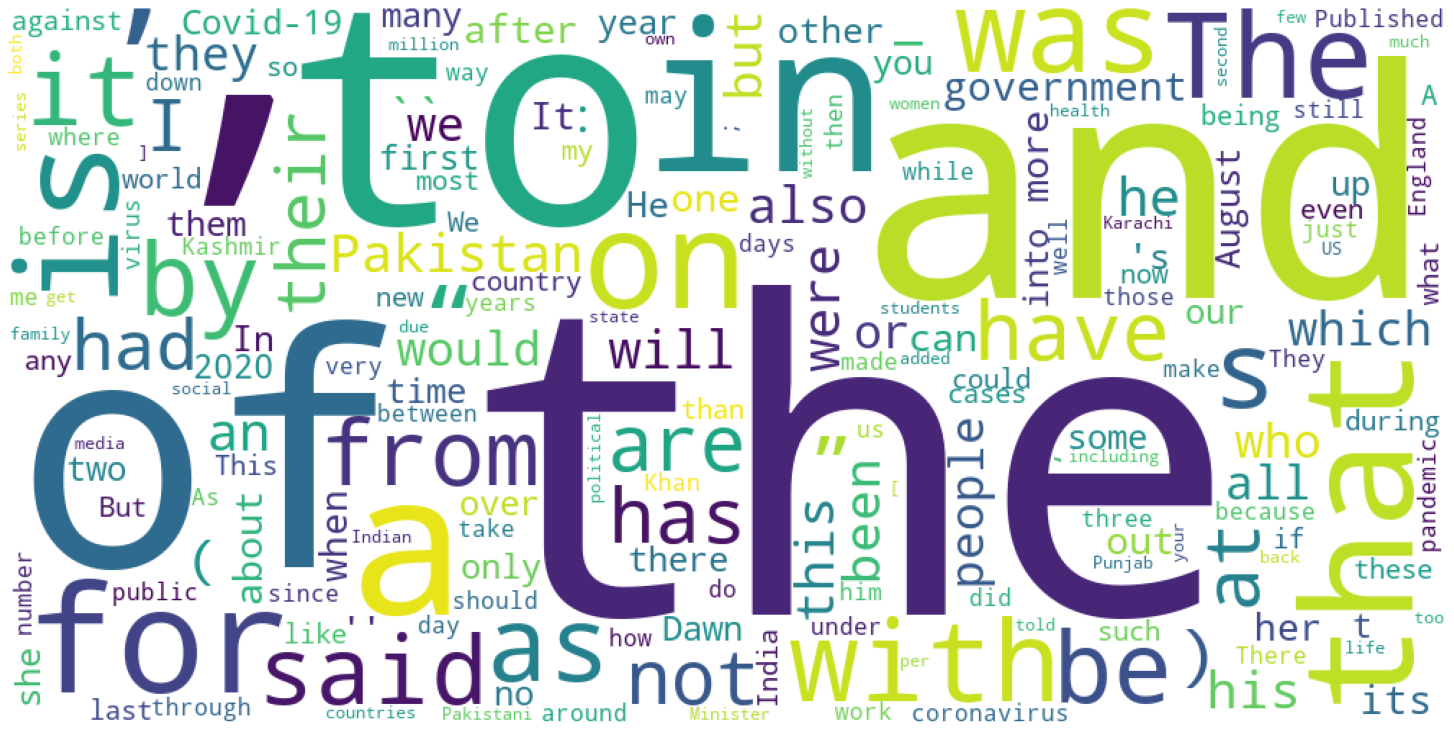

In [3]:
# code for making word cloud
sentences = ' '.join(sentences_df["sentences"])
tokens = word_tokenize(sentences)
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(frequency_dist)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 4. Data Pre-processing

In [4]:
# pre-processing code
def clean_text(text,replace=''):
    lemmatizer = WordNetLemmatizer() 
    stop_words = set(stopwords.words('english'))
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    text = re.sub(r'\d+', '', str(text))
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = "".join(i for i in text if ord(i) < 128) # remove non-ascii characters
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation characters
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', replace, text) # removes URL from string
    # remove stop words andapplying Lemmatization
    text = ' '.join(lemmatizer.lemmatize(word, pos ="a") for word in text.split() if word not in stop_words) 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    return text

In [5]:
# apply pre-processing on sentences
sentences_df['sentences'] = sentences_df['sentences'].apply(clean_text)
sentences_df['sentences'].replace('nan', np.nan, inplace=True)
sentences_df['sentences'].replace('', np.nan, inplace=True)
sentences_df = sentences_df.dropna()
sentences_df = sentences_df.drop_duplicates()
sentences_df.reset_index(inplace = True, drop = True)

## Word Cloud Cleaned Data

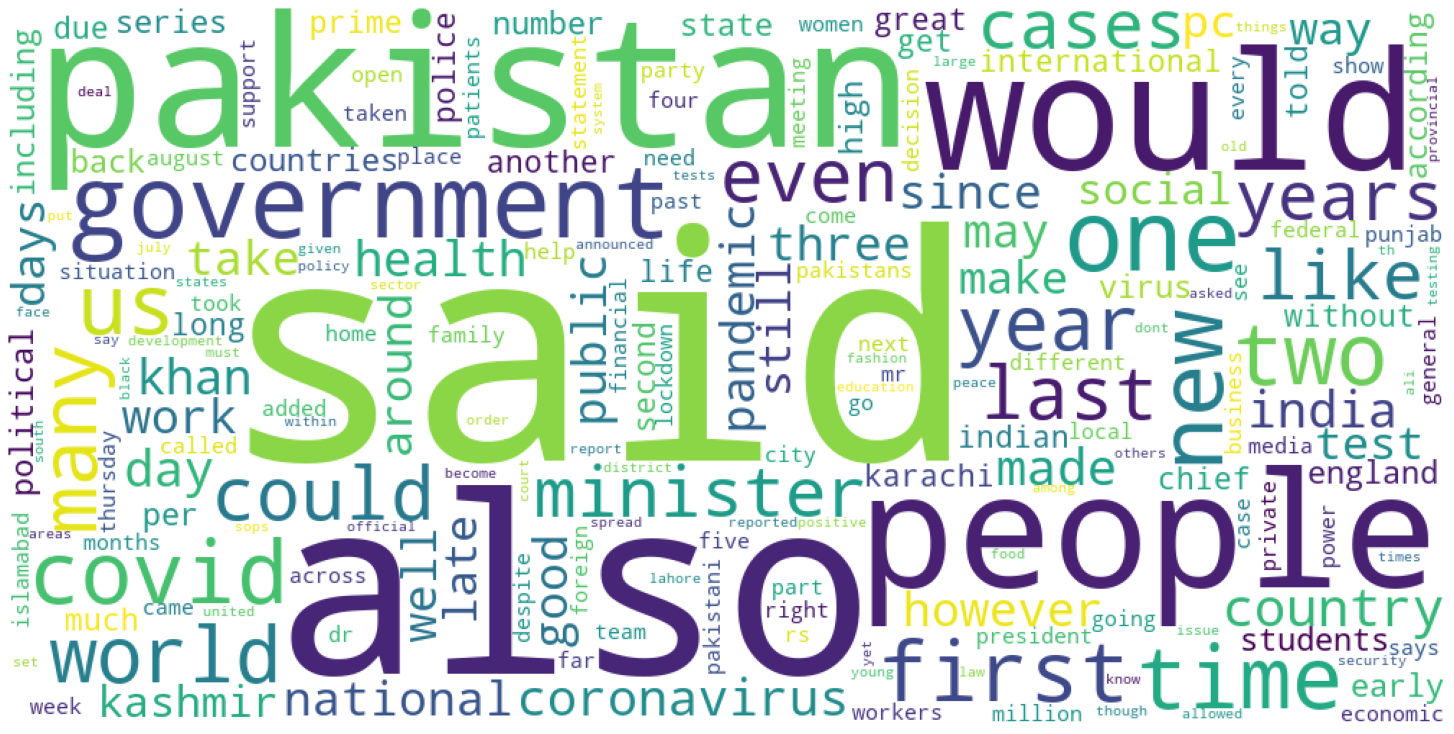

In [6]:
# code for making word cloud
sentences = ' '.join(sentences_df["sentences"])
tokens = word_tokenize(sentences)
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(frequency_dist)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 5. Sentiment Analysis

In [7]:
# sentiment analysis using textblob 
'''
Textblob will give us the polarity score from -1 to 1 range. If polarity is
0 then sentence is neutral, if polarity is > 0 but <=1 then it is positive
or polarity is < 0 but >=-1 then it is negative.   
'''
polarity_score = [] 

for text in sentences_df['sentences']:    
    blob = TextBlob(text)
    for sentence in blob.sentences:
        if sentence.sentiment.polarity > 0.0:
            polarity_score.append('positive')
        elif sentence.sentiment.polarity < 0.0:
            polarity_score.append('negative')
        else:
            polarity_score.append('neutral')

sentences_df['sentiment'] = pd.DataFrame(polarity_score)
sentences_df.head()

,sentences,sentiment
0,special assistant prime minister digital pakis...,positive
1,resignations come days opposition lambasted go...,positive
2,added canadian nationality consequence birth a...,neutral
3,early detection management diabetes hypertensi...,positive
4,special assistant prime minister sapm legal au...,positive


# 6. Exploratory Data Analysis (EDA)

In [8]:
sentences_df.shape

(12843, 2)

In [9]:
sentences_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12843 entries, 0 to 12842
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentences  12843 non-null  object
 1   sentiment  12843 non-null  object
dtypes: object(2)
memory usage: 200.8+ KB


In [10]:
sentences_df.describe()

,sentences,sentiment
count,12843,12843
unique,12843,3
top,reality measures likely face court challenges ...,neutral
freq,1,5342


In [11]:
sentences_df['sentiment'].value_counts()

neutral     5342
positive    4960
negative    2541
Name: sentiment, dtype: int64

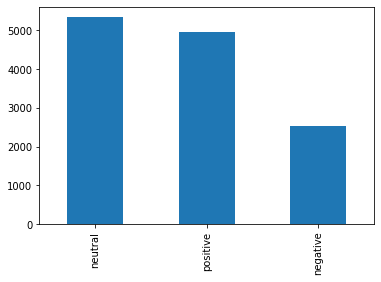

In [12]:
sentences_df['sentiment'].value_counts().plot.bar()

# 7. Classification using Machine Learning Models

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [14]:
# Graphical Confusion Matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
# Label encoding of sentiment classes
label = LabelEncoder()
sentences_df_copied = sentences_df.copy()
sentences_df_copied['sentiment'] = label.fit_transform(sentences_df_copied['sentiment'])
sentences_df_copied.head()

,sentences,sentiment
0,special assistant prime minister digital pakis...,2
1,resignations come days opposition lambasted go...,2
2,added canadian nationality consequence birth a...,1
3,early detection management diabetes hypertensi...,2
4,special assistant prime minister sapm legal au...,2


In [16]:
classes = ['Negative(0)','Neutral(1)','Positive(2)']
my_categories = ['0', '1', '2']

### Train test split

In [17]:
# Seperate data into feature and results
X, y = sentences_df_copied['sentences'], sentences_df_copied['sentiment']

# Split data in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 7.1 Uni-gram and TF-IDF Features

In [18]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 1))
# TF-IDF BASED FEATURE REPRESENTATION
tfidf.fit(X_train)
        
train_feature_set = tfidf.transform(X_train)
test_feature_set = tfidf.transform(X_test)

### 7.1.1 Logistic Regression

accuracy 0.7891622547492992
              precision    recall  f1-score   support

           0       0.86      0.43      0.57       627
           1       0.74      0.94      0.83      1364
           2       0.84      0.80      0.82      1220

    accuracy                           0.79      3211
   macro avg       0.81      0.72      0.74      3211
weighted avg       0.80      0.79      0.78      3211

Confusion matrix, without normalization


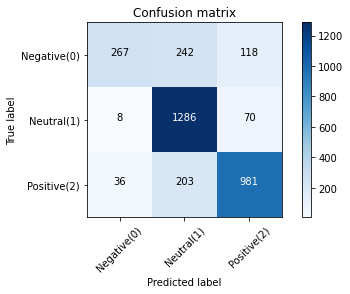

In [19]:
# instantiate the model
logreg = LogisticRegression(random_state=42, max_iter=1000)

logreg.fit(train_feature_set,y_train)

# make predictions
y_pred = logreg.predict(test_feature_set)
lrm_1 = accuracy_score(y_pred, y_test)

print('accuracy %s' % lrm_1)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

### 7.1.2 SVM

accuracy 0.8265337900965432
              precision    recall  f1-score   support

           0       0.84      0.61      0.71       627
           1       0.79      0.96      0.86      1364
           2       0.88      0.79      0.83      1220

    accuracy                           0.83      3211
   macro avg       0.83      0.79      0.80      3211
weighted avg       0.83      0.83      0.82      3211

Confusion matrix, without normalization


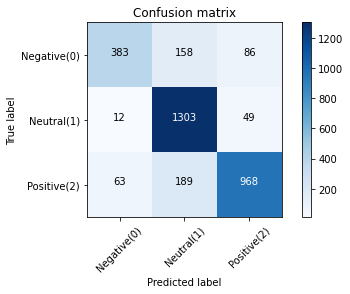

In [20]:
# instantiate the model
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(train_feature_set,y_train)

# make predictions
y_pred = svc_clf.predict(test_feature_set)
svm_1 = accuracy_score(y_pred, y_test)

print('accuracy %s' % svm_1)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

### 7.1.3 Decision Tree

accuracy 0.8691996262846465
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       627
           1       0.91      0.94      0.93      1364
           2       0.87      0.85      0.86      1220

    accuracy                           0.87      3211
   macro avg       0.85      0.84      0.85      3211
weighted avg       0.87      0.87      0.87      3211

Confusion matrix, without normalization


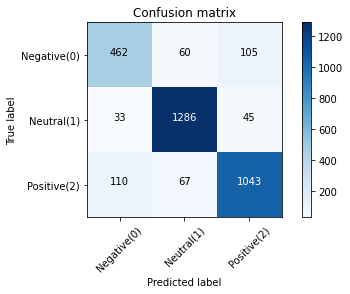

In [21]:
# instantiate the model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(train_feature_set,y_train)

# make predictions
y_pred = dt_clf.predict(test_feature_set)
dt_1 = accuracy_score(y_pred, y_test)

print('accuracy %s' % dt_1)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

### 7.1.4 Random Forest

accuracy 0.864528184366241
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       627
           1       0.85      0.98      0.91      1364
           2       0.90      0.83      0.86      1220

    accuracy                           0.86      3211
   macro avg       0.86      0.83      0.84      3211
weighted avg       0.87      0.86      0.86      3211

Confusion matrix, without normalization


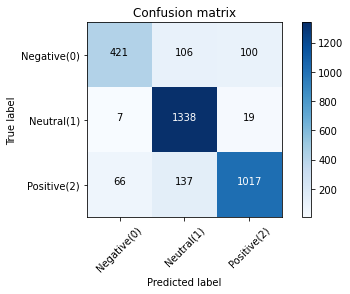

In [22]:
# instantiate the model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(train_feature_set,y_train)

# make predictions
y_pred = rf_clf.predict(test_feature_set)
rf_1 = accuracy_score(y_pred, y_test)

print('accuracy %s' % rf_1)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

### 7.1.5 XGBoost

accuracy 0.7100591715976331
              precision    recall  f1-score   support

           0       0.83      0.30      0.45       627
           1       0.63      0.99      0.77      1364
           2       0.88      0.60      0.72      1220

    accuracy                           0.71      3211
   macro avg       0.78      0.63      0.64      3211
weighted avg       0.76      0.71      0.69      3211

Confusion matrix, without normalization


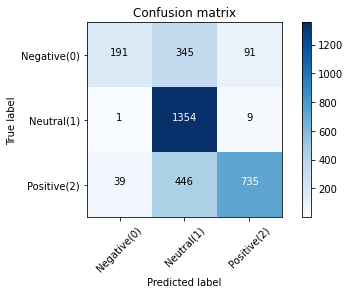

In [23]:
# instantiate the model
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(train_feature_set,y_train)

# make predictions
y_pred = xgb_clf.predict(test_feature_set)
xgb_1 = accuracy_score(y_pred, y_test)

print('accuracy %s' % xgb_1)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

### 7.1.6 CatBoost

Learning rate set to 0.088816
0:	learn: 1.0810298	total: 449ms	remaining: 7m 28s
1:	learn: 1.0651541	total: 788ms	remaining: 6m 33s
2:	learn: 1.0507681	total: 1.11s	remaining: 6m 9s
3:	learn: 1.0399428	total: 1.43s	remaining: 5m 56s
4:	learn: 1.0295277	total: 1.78s	remaining: 5m 53s
5:	learn: 1.0193848	total: 2.1s	remaining: 5m 48s
6:	learn: 1.0103716	total: 2.46s	remaining: 5m 49s
7:	learn: 1.0025010	total: 2.8s	remaining: 5m 47s
8:	learn: 0.9960049	total: 3.13s	remaining: 5m 45s
9:	learn: 0.9888991	total: 3.47s	remaining: 5m 43s
10:	learn: 0.9850241	total: 3.81s	remaining: 5m 42s
11:	learn: 0.9802745	total: 4.14s	remaining: 5m 41s
12:	learn: 0.9747598	total: 4.47s	remaining: 5m 39s
13:	learn: 0.9702782	total: 4.83s	remaining: 5m 39s
14:	learn: 0.9659843	total: 5.16s	remaining: 5m 38s
15:	learn: 0.9615120	total: 5.49s	remaining: 5m 37s
16:	learn: 0.9573045	total: 5.85s	remaining: 5m 38s
17:	learn: 0.9544410	total: 6.17s	remaining: 5m 36s
18:	learn: 0.9503804	total: 6.5s	remaining: 5m 

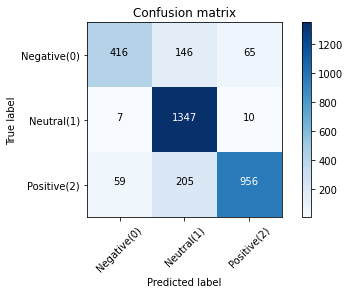

In [24]:
# instantiate the model
cat_clf = CatBoostClassifier(random_state=42)
cat_clf.fit(train_feature_set,y_train)

# make predictions
y_pred = cat_clf.predict(test_feature_set)
cat_1 = accuracy_score(y_pred, y_test)

print('accuracy %s' % cat_1)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

### 7.1.7 Naive Bayes

accuracy 0.6677047648707568
              precision    recall  f1-score   support

           0       0.91      0.11      0.20       627
           1       0.73      0.75      0.74      1364
           2       0.60      0.86      0.71      1220

    accuracy                           0.67      3211
   macro avg       0.75      0.57      0.55      3211
weighted avg       0.72      0.67      0.62      3211

Confusion matrix, without normalization


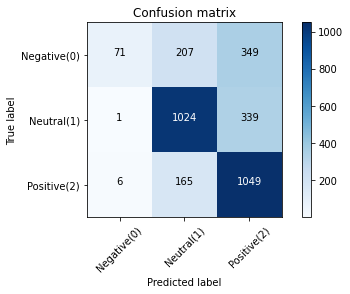

In [25]:
# instantiate the model
nb_clf = MultinomialNB()
nb_clf.fit(train_feature_set,y_train)

# make predictions
y_pred = nb_clf.predict(test_feature_set)
nb_1 = accuracy_score(y_pred, y_test)

print('accuracy %s' % nb_1)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

## 7.2 Uni+Bi-grams and TF-IDF Features

In [26]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
# TF-IDF BASED FEATURE REPRESENTATION
tfidf.fit(X_train)
        
train_feature_set = tfidf.transform(X_train)
test_feature_set = tfidf.transform(X_test)

### 7.2.1 Logistic Regression

accuracy 0.7804422298349424
              precision    recall  f1-score   support

           0       0.87      0.41      0.56       627
           1       0.74      0.93      0.82      1364
           2       0.82      0.80      0.81      1220

    accuracy                           0.78      3211
   macro avg       0.81      0.71      0.73      3211
weighted avg       0.79      0.78      0.77      3211

Confusion matrix, without normalization


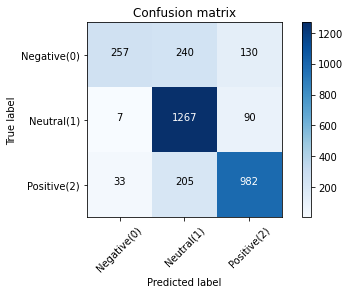

In [27]:
# instantiate the model
logreg = LogisticRegression(random_state=42, max_iter=1000)

logreg.fit(train_feature_set,y_train)

# make predictions
y_pred = logreg.predict(test_feature_set)
lrm_2 = accuracy_score(y_pred, y_test)

print('accuracy %s' % lrm_2)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

### 7.2.2 SVM

accuracy 0.8131423232637808
              precision    recall  f1-score   support

           0       0.83      0.59      0.69       627
           1       0.78      0.94      0.85      1364
           2       0.86      0.79      0.82      1220

    accuracy                           0.81      3211
   macro avg       0.82      0.77      0.79      3211
weighted avg       0.82      0.81      0.81      3211

Confusion matrix, without normalization


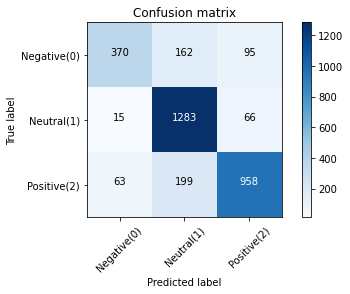

In [28]:
# instantiate the model
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(train_feature_set,y_train)

# make predictions
y_pred = svc_clf.predict(test_feature_set)
svm_2 = accuracy_score(y_pred, y_test)

print('accuracy %s' % svm_2)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

### 7.2.3 Decision Tree

accuracy 0.8679539084397384
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       627
           1       0.91      0.95      0.93      1364
           2       0.86      0.85      0.86      1220

    accuracy                           0.87      3211
   macro avg       0.85      0.84      0.85      3211
weighted avg       0.87      0.87      0.87      3211

Confusion matrix, without normalization


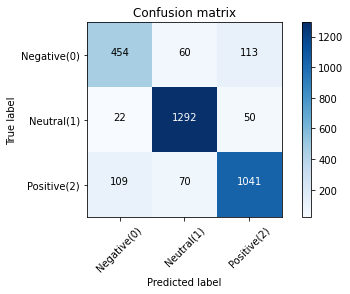

In [29]:
# instantiate the model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(train_feature_set,y_train)

# make predictions
y_pred = dt_clf.predict(test_feature_set)
dt_2 = accuracy_score(y_pred, y_test)

print('accuracy %s' % dt_2)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

### 7.2.4 Random Forest

accuracy 0.8617253192151978
              precision    recall  f1-score   support

           0       0.87      0.67      0.75       627
           1       0.84      0.98      0.90      1364
           2       0.89      0.83      0.86      1220

    accuracy                           0.86      3211
   macro avg       0.87      0.83      0.84      3211
weighted avg       0.86      0.86      0.86      3211

Confusion matrix, without normalization


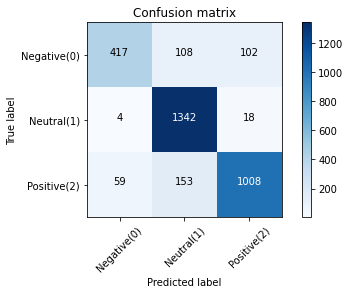

In [30]:
# instantiate the model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(train_feature_set,y_train)

# make predictions
y_pred = rf_clf.predict(test_feature_set)
rf_2 = accuracy_score(y_pred, y_test)

print('accuracy %s' % rf_2)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

### 7.2.5 XGBoost

accuracy 0.708502024291498
              precision    recall  f1-score   support

           0       0.83      0.30      0.44       627
           1       0.63      0.99      0.77      1364
           2       0.88      0.60      0.71      1220

    accuracy                           0.71      3211
   macro avg       0.78      0.63      0.64      3211
weighted avg       0.76      0.71      0.68      3211

Confusion matrix, without normalization


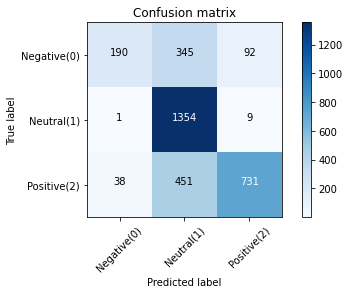

In [31]:
# instantiate the model
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(train_feature_set,y_train)

# make predictions
y_pred = xgb_clf.predict(test_feature_set)
xgb_2 = accuracy_score(y_pred, y_test)

print('accuracy %s' % xgb_2)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

### 7.2.6 CatBoost

Learning rate set to 0.088816
0:	learn: 1.0803358	total: 495ms	remaining: 8m 14s
1:	learn: 1.0637874	total: 932ms	remaining: 7m 44s
2:	learn: 1.0497372	total: 1.37s	remaining: 7m 35s
3:	learn: 1.0380593	total: 1.8s	remaining: 7m 28s
4:	learn: 1.0299067	total: 2.25s	remaining: 7m 26s
5:	learn: 1.0211190	total: 2.67s	remaining: 7m 22s
6:	learn: 1.0129866	total: 3.1s	remaining: 7m 19s
7:	learn: 1.0037672	total: 3.53s	remaining: 7m 18s
8:	learn: 0.9978116	total: 3.95s	remaining: 7m 14s
9:	learn: 0.9917124	total: 4.37s	remaining: 7m 12s
10:	learn: 0.9862494	total: 4.8s	remaining: 7m 11s
11:	learn: 0.9804341	total: 5.23s	remaining: 7m 10s
12:	learn: 0.9758946	total: 5.67s	remaining: 7m 10s
13:	learn: 0.9719379	total: 6.09s	remaining: 7m 9s
14:	learn: 0.9675384	total: 6.52s	remaining: 7m 7s
15:	learn: 0.9634830	total: 6.94s	remaining: 7m 6s
16:	learn: 0.9593971	total: 7.37s	remaining: 7m 6s
17:	learn: 0.9559555	total: 7.81s	remaining: 7m 5s
18:	learn: 0.9525602	total: 8.23s	remaining: 7m 4s
1

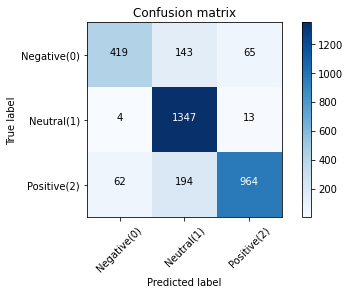

In [32]:
# instantiate the model
cat_clf = CatBoostClassifier(random_state=42)
cat_clf.fit(train_feature_set,y_train)

# make predictions
y_pred = cat_clf.predict(test_feature_set)
cat_2 = accuracy_score(y_pred, y_test)

print('accuracy %s' % cat_2)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

### 7.2.7 Naive Bayes

accuracy 0.6490189971971349
              precision    recall  f1-score   support

           0       1.00      0.08      0.15       627
           1       0.72      0.73      0.72      1364
           2       0.59      0.85      0.70      1220

    accuracy                           0.65      3211
   macro avg       0.77      0.55      0.52      3211
weighted avg       0.72      0.65      0.60      3211

Confusion matrix, without normalization


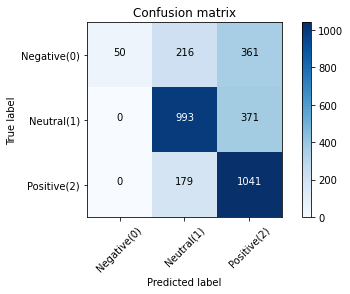

In [33]:
# instantiate the model
nb_clf = MultinomialNB()
nb_clf.fit(train_feature_set,y_train)

# make predictions
y_pred = nb_clf.predict(test_feature_set)
nb_2 = accuracy_score(y_pred, y_test)

print('accuracy %s' % nb_2)
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

# 8. Comperison of Machine Learning Models Accuracies

In [34]:
Algorithms = [
              'Logistic Regression uni-gram','SVM (linear) uni-gram','Decision Tree uni-gram', 'Random Forest uni-gram',
              'XGBoost uni-gram', 'Catboost uni-gram', 'Naive Bayes uni-gram', 'Logistic Regression uni+bi-gram',
              'SVM (linear) uni+bi-gram','Decision Tree uni+bi-gram', 'Random Forest uni+bi-gram',
              'XGBoost uni+bi-gram', 'Catboost uni+bi-gram', 'Naive Bayes uni+bi-gram'
              ]
accuracy = [
            lrm_1, svm_1, dt_1, rf_1,
            xgb_1, cat_1, nb_1, lrm_2,
            svm_2, dt_2, rf_2, xgb_2,
            cat_2, nb_2,
            ]

In [35]:
accuracy_df = pd.DataFrame({"Classifiers": Algorithms,
                      "Accuracy": accuracy}, index = Algorithms)
accuracy_df

,Classifiers,Accuracy
Logistic Regression uni-gram,Logistic Regression uni-gram,0.789162
SVM (linear) uni-gram,SVM (linear) uni-gram,0.826534
Decision Tree uni-gram,Decision Tree uni-gram,0.869200
Random Forest uni-gram,Random Forest uni-gram,0.864528
XGBoost uni-gram,XGBoost uni-gram,0.710059
Catboost uni-gram,Catboost uni-gram,0.846777
Naive Bayes uni-gram,Naive Bayes uni-gram,0.667705
Logistic Regression uni+bi-gram,Logistic Regression uni+bi-gram,0.780442
SVM (linear) uni+bi-gram,SVM (linear) uni+bi-gram,0.813142
Decision Tree uni+bi-gram,Decision Tree uni+bi-gram,0.867954


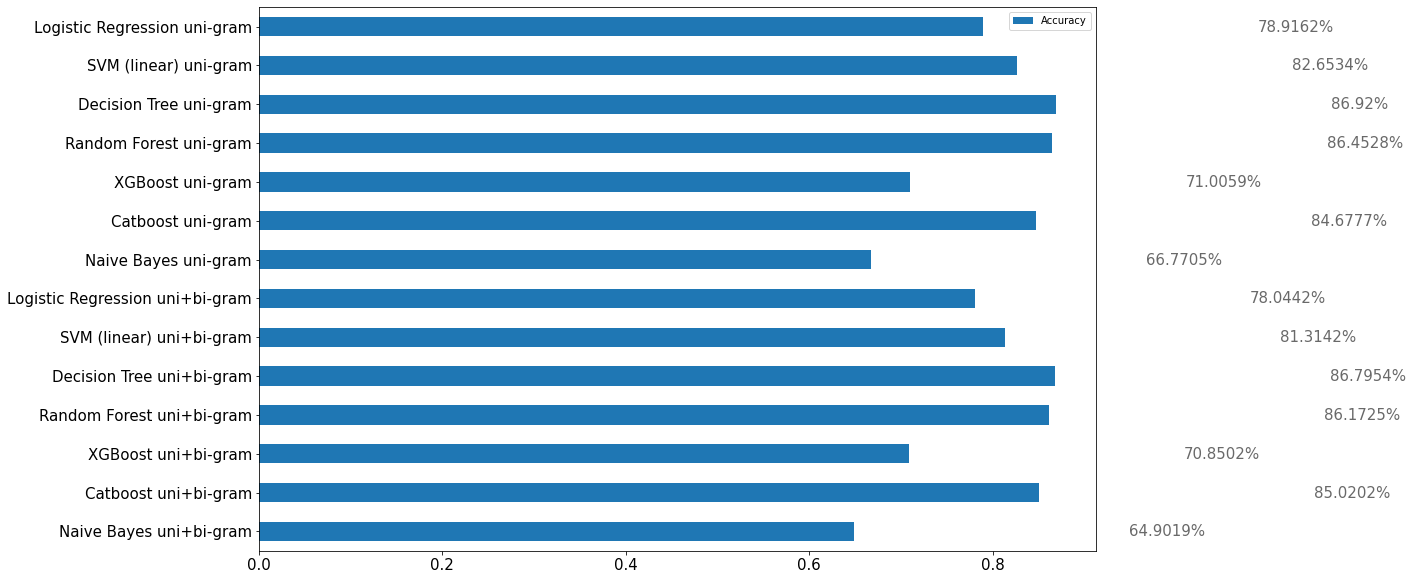

In [36]:
ax = accuracy_df.plot.barh(figsize=(15,10),fontsize=15)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width())*100,4))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

Comperison Description:  
On our this dataset Decision Tree Classifier performs best and achived 86.92% accuracy on uni-gram and tf-idf features. Other significant models are Random Forest Classifer, CatBoost Classifier. These three models almost performs equal performance on uni-gram and uni+bi-grams tf-idf features. Least performance model is Naive Bayes.

# 9. Stacking Classifier

As by comperison we see Decision Tree, Random Forest and CatBoost performs better on our dataset. So i am going to use these three models and make a Stacking Classifier and will see if accuracy is approve. 

In [37]:
from sklearn.ensemble import StackingClassifier

In [38]:
# Instantiate the estimator regressors
estimators = [
    ('dt_clf', DecisionTreeClassifier(random_state=42)),
    ('rf_clf', RandomForestClassifier(random_state=42)),
    ('cat_clf', CatBoostClassifier(random_state=42, verbose=False))
]

In [39]:
# Stacking Classifier scikit-learn
stack_clf = StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier(random_state=42),
                               verbose=True, n_jobs=-1)
stack_clf.fit(train_feature_set, y_train)

StackingClassifier(cv=None,
                   estimators=[('dt_clf',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                 

Accuracy Stacking Classifier 0.8978511367175335
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       627
           1       0.91      0.96      0.93      1364
           2       0.91      0.87      0.89      1220

    accuracy                           0.90      3211
   macro avg       0.89      0.88      0.88      3211
weighted avg       0.90      0.90      0.90      3211

Confusion matrix, without normalization


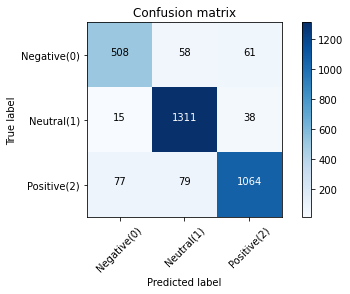

In [40]:
pred = stack_clf.predict(test_feature_set)

print('Accuracy Stacking Classifier', accuracy_score(pred, y_test))
print(classification_report(y_test, pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

By using Stacking Classifier i achieve 89.7851% accuracy which is almost 3% higher than the best simple machine learning model.

# 10. Classification using Deep Learning Models

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

In [42]:
max_features = 4000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(sentences_df_copied['sentences'].values)

pd_length = max([len(sentence.split()) for sentence in sentences_df_copied['sentences']])
# prepare the data
X = tokenizer.texts_to_sequences(sentences_df_copied['sentences'].values)
X = pad_sequences(X, maxlen=pd_length)

Y = to_categorical(sentences_df_copied.sentiment)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', Y.shape)

Found 22020 unique tokens.
Shape of data tensor: (12843, 137)
Shape of label tensor: (12843, 3)


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(10274, 137) (10274, 3)
(2569, 137) (2569, 3)


## 10.1 LSTM Model

In [44]:
embed_dim = 300
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 137, 300)          1200000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 137, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 137, 128)          219648    
_________________________________________________________________
lstm_1 (LSTM)                (None, 137, 128)          131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 1,683,203
Trainable params: 1,683,203
Non-trainable params: 0
______________________________________________

In [45]:
epochs = 50
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=2, min_delta=0.0001)])

Epoch 1/50
145/145 [==============================] - 22s 152ms/step - loss: 0.8518 - accuracy: 0.6119 - val_loss: 0.6144 - val_accuracy: 0.7568
Epoch 2/50
145/145 [==============================] - 21s 143ms/step - loss: 0.3689 - accuracy: 0.8779 - val_loss: 0.4064 - val_accuracy: 0.8765
Epoch 3/50
145/145 [==============================] - 21s 143ms/step - loss: 0.2227 - accuracy: 0.9321 - val_loss: 0.5160 - val_accuracy: 0.8463
Epoch 4/50
145/145 [==============================] - 21s 144ms/step - loss: 0.1772 - accuracy: 0.9461 - val_loss: 0.4734 - val_accuracy: 0.8589


In [46]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

81/81 [==============================] - 4s 45ms/step - loss: 0.4540 - accuracy: 0.8754
Test set
  Loss: 0.454
  Accuracy: 0.875


Accuracy LSTM Classifier 0.8754379135850525
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       500
           1       0.90      0.93      0.91      1093
           2       0.88      0.87      0.88       976

    accuracy                           0.88      2569
   macro avg       0.86      0.85      0.86      2569
weighted avg       0.87      0.88      0.87      2569

Confusion matrix, without normalization


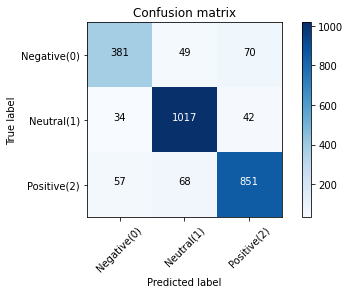

In [47]:
pred = model.predict(X_test)

# Choose the class with higher probability 
y_pred = np.argmax(pred, axis=1)

y_test = np.argmax(Y_test, axis=1)

print('Accuracy LSTM Classifier', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

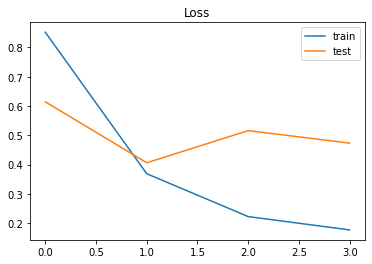

In [48]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

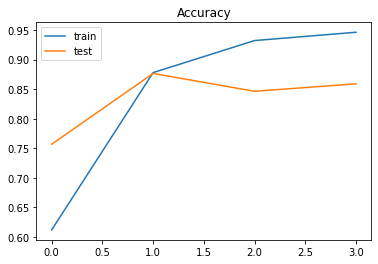

In [49]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

## 10.2 LSTM + Conv1D 

In [50]:
model_1 = Sequential()
model_1.add(Embedding(max_features, embed_dim, trainable=True, input_length = X.shape[1]))
model_1.add(Conv1D(filters=32, kernel_size=3, padding='same'))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(LSTM(units=128, return_sequences=True, dropout=0.1))
model_1.add(LSTM(units=128, return_sequences=True, dropout=0.1))
model_1.add(LSTM(units=128, return_sequences=False, dropout=0.1))
model_1.add(Dense(64))
model_1.add(Dropout(rate=0.25))
model_1.add(Dense(3, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 137, 300)          1200000   
_________________________________________________________________
conv1d (Conv1D)              (None, 137, 32)           28832     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 68, 32)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 68, 128)           82432     
_________________________________________________________________
lstm_4 (LSTM)                (None, 68, 128)           131584    
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [51]:
epochs = 50
batch_size = 64

history_1 = model_1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=2, min_delta=0.0001)])

Epoch 1/50
145/145 [==============================] - 14s 100ms/step - loss: 0.8949 - accuracy: 0.5875 - val_loss: 0.6641 - val_accuracy: 0.7189
Epoch 2/50
145/145 [==============================] - 13s 91ms/step - loss: 0.4927 - accuracy: 0.8191 - val_loss: 0.5295 - val_accuracy: 0.8278
Epoch 3/50
145/145 [==============================] - 13s 91ms/step - loss: 0.3653 - accuracy: 0.8781 - val_loss: 0.5749 - val_accuracy: 0.8249
Epoch 4/50
145/145 [==============================] - 13s 91ms/step - loss: 0.2715 - accuracy: 0.9138 - val_loss: 0.5634 - val_accuracy: 0.8424


In [52]:
accr_1 = model_1.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_1[0],accr_1[1]))

81/81 [==============================] - 2s 27ms/step - loss: 0.5200 - accuracy: 0.8416
Test set
  Loss: 0.520
  Accuracy: 0.842


Accuracy LSTM + ConV1D Classifier 0.8415725963409887
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       500
           1       0.90      0.90      0.90      1093
           2       0.86      0.87      0.86       976

    accuracy                           0.84      2569
   macro avg       0.81      0.81      0.81      2569
weighted avg       0.84      0.84      0.84      2569

Confusion matrix, without normalization


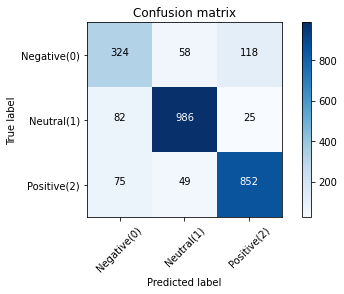

In [53]:
pred = model_1.predict(X_test)

# Choose the class with higher probability 
y_pred = np.argmax(pred, axis=1)

y_test = np.argmax(Y_test, axis=1)

print('Accuracy LSTM + ConV1D Classifier', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

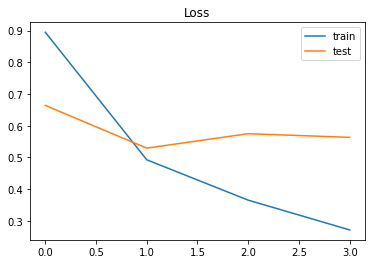

In [54]:
plt.title('Loss')
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='test')
plt.legend()
plt.show();

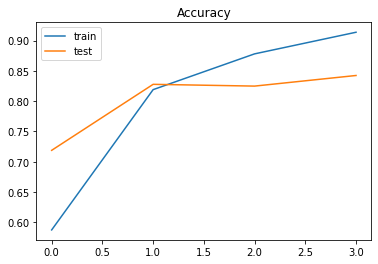

In [55]:
plt.title('Accuracy')
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='test')
plt.legend()
plt.show();

## 10.3 LSTM + GRU

In [56]:
model_2 = Sequential()
model_2.add(Embedding(max_features, embed_dim, trainable=True, input_length = X.shape[1]))
model_2.add(Dropout(rate=0.15))
model_2.add(LSTM(128, return_sequences=True, dropout=0.1, name="LSTM"))
model_2.add(GRU(128, return_sequences=False, dropout=0.1, name="GRU"))
model_2.add(Dense(128, name="Dense2"))
model_2.add(Dropout(rate=0.15))
model_2.add(Dense(64, name="Dense3"))
model_2.add(Dense(3, activation='softmax', name="Output"))
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 137, 300)          1200000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 137, 300)          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 137, 128)          219648    
_________________________________________________________________
GRU (GRU)                    (None, 128)               99072     
_________________________________________________________________
Dense2 (Dense)               (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
Dense3 (Dense)               (None, 64)               

In [59]:
epochs = 50
batch_size = 64

history_2 = model_2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=2, min_delta=0.0001)])

Epoch 1/50
145/145 [==============================] - 16s 113ms/step - loss: 0.5966 - accuracy: 0.7695 - val_loss: 0.5380 - val_accuracy: 0.8317
Epoch 2/50
145/145 [==============================] - 15s 106ms/step - loss: 0.2701 - accuracy: 0.9148 - val_loss: 0.5348 - val_accuracy: 0.8375
Epoch 3/50
145/145 [==============================] - 15s 107ms/step - loss: 0.1755 - accuracy: 0.9460 - val_loss: 0.6026 - val_accuracy: 0.8385
Epoch 4/50
145/145 [==============================] - 16s 107ms/step - loss: 0.1205 - accuracy: 0.9617 - val_loss: 0.7243 - val_accuracy: 0.8220


In [62]:
accr_2 = model_2.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_2[0],accr_2[1]))

81/81 [==============================] - 2s 30ms/step - loss: 0.6663 - accuracy: 0.8334
Test set
  Loss: 0.666
  Accuracy: 0.833


Accuracy LSTM + ConV1D Classifier 0.8333982094200078
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       500
           1       0.87      0.88      0.87      1093
           2       0.84      0.85      0.84       976

    accuracy                           0.83      2569
   macro avg       0.82      0.81      0.81      2569
weighted avg       0.83      0.83      0.83      2569

Confusion matrix, without normalization


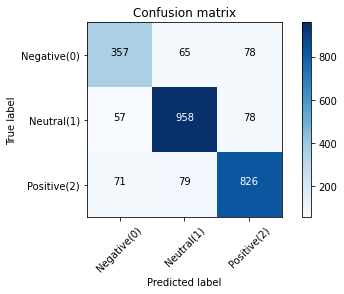

In [63]:
pred = model_2.predict(X_test)

# Choose the class with higher probability 
y_pred = np.argmax(pred, axis=1)

y_test = np.argmax(Y_test, axis=1)

print('Accuracy LSTM + GRU Classifier', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_categories))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes
                      ,normalize= False,  title='Confusion matrix')

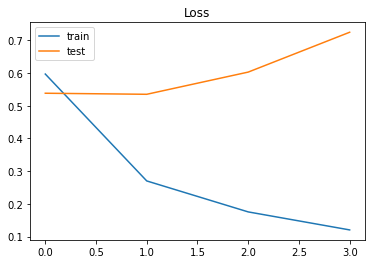

In [60]:
plt.title('Loss')
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='test')
plt.legend()
plt.show();

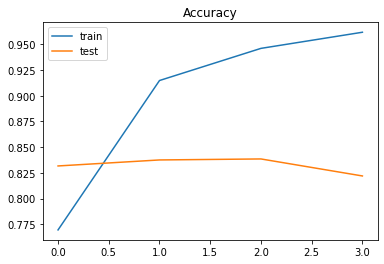

In [61]:
plt.title('Accuracy')
plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# 11. Conclusion

I achived 89.7851% accuracy on Stacking Classifier. Which is combined of Decision Tree, Random Forest and CatBoost Classifer, and Beta Classifier of Stacking Classifer is Random Forest.  
Future work for improving accuracy:  
1. Balance the dataset by getting more data or using oversampling technique SMOTE.
2. We may also can improve the model accuracy by tuning the parameters of models.